# Probabilities
> The most routine task of statistics is to find the probability that an event, or a series of events, will occur.

## Events vs Sample Space
### A Sample Space could be though of as a list of all possible outcomes that an event could take.
> EX: Sample space for Six-Sided die - Sample Space = {1,2,3,4,5,6}

### An Event could be thought of as the probability of a subset of the event space.
> Ex: Probability that dice roll results in a 3 - P(x = 3) = 1/6

### In the dice example, events of interest might include
> a) The outcome is an even number.

> b) The outcome is less than three.

> ... etc

<br>
<br>

## Types of events

### Simple Events 
#### Events that should only have one representative in sample space.
> Ex: Rolling a 3: There is only 1 event where a dice roll can result in a 3. P(x = 3)

### Compound Events 
#### Events where there are multiple representatives in sample space.
> Ex: Rolling an Even: There is more than 1 event where a dice roll can result in an even number. p(x = 2, x = 4, or x = 6)

### Certain Events
#### Events that have a certainty of occuring.
> Ex: Rolling a number between 1-6: This may seem trivial but the distinction is important.

### Impossible Events
#### Events that have a certainty of NOT occuring.
> Ex: Rolling a 7: This may also seem trivial but the distinction is equally as important.

### Equally Likely Events
#### Events that are equally likely to occur.
> Ex: Rolling an Even || Rolling an Odd: A fair die has equal amount of Evens as Odds, the probabilities are equally likely.

### Complementary Events
#### Events that are complements to eachother. Cannot occur at the same time.
> Ex: Rolling an Even || Rolling an Odd: When you roll an Even, the probability of rolling an odd is complementary.

> Ex: p(x = even) = p1  || p(x = odd) = [1 - p1]

### Mutually Exclusive Events 
#### Similar to complementary events except not necessarily binary.
> Ex: Two simple events are ALWAYS mutually exclusive. you CANNOT roll a 1 AND 3

> Ex: Two compound events may or may not be. you CAN roll a 2 AND an Even

# Actual Programming ;)

## Coin Toss

You toss a coin 30 times and see head 24 times. Is it a fair coin?

**Hypothesis 1**: Tossing a fair coin will get you 15 heads in 30 tosses. This coin is biased

**Hypothesis 2**: Come on, even a fair coin could show 24 heads in 30 tosses. This is just by chance

#### Statistical Method

P(H) = ? 

P(HH) = ?

P(THH) = ?

Now, slightly tougher : P(2H, 1T) = ?

Generalizing, 

<img style="float: left;" src="img/binomial.gif">

<br>
<br>
<br>
<br>


**What is the probability of getting 24 heads in 30 tosses ?**

It is the probability of getting heads 24 times or more. 

#### Hacker's Approach

Simulation. Run the experiment 100,000 times. Find the percentage of times the experiment returned 24 or more heads. If it is more than 5%, we conclude that the coin is biased. 

In [2]:
import numpy as np  

total_tosses = 30
num_heads = 24
prob_head = 0.5

#0 is tail. 1 is heads. Generate one experiment
experiment = np.random.randint(0,2,total_tosses)
print("Data of the Experiment:", experiment)

#Find the number of heads
print("Heads in the Experiment:", experiment[experiment==1])  #This will give all the heads in the array

head_count = experiment[experiment==1].shape[0] #This will get the count of heads in the array
print("Number of heads in the experiment:", head_count)

Data of the Experiment: [1 0 0 0 1 0 0 1 1 1 1 0 0 1 1 1 0 0 1 1 0 0 0 0 1 1 1 1 0 0]
Heads in the Experiment: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Number of heads in the experiment: 15


In [16]:
#Now, the above experiment needs to be repeated 100 times. Let's write a function and put the above code in a loop

def coin_toss_experiment(times_to_repeat):

    # Creates an "empty" 2-dimensional head_count array with 100 "arrays" inside. 
    # We will populate each array with each iteration of the loop
    # In other words: head_count is a container that we will later fill with several experimental head_count arrays.
    # As such: 
    '''
    head_count = [ [heads_in_trial_1], 
                   [heads_in_trial_2]], 
                                  ... , 
                   [heads_in_trial_n]]
            where 'n' is our 'times_to_repeat' parameter
    '''
    
    head_count = np.empty([times_to_repeat,1], dtype=int)
    
    for trial in np.arange(times_to_repeat):
        
        # Experiment will be 1 for heads or 0 for tails.
        experiment = np.random.randint(0,2,total_tosses)
        
        # Attaches the amount of heads per trial to matching array in head_array.
        head_count[trial] = experiment[experiment==1].shape[0]
        
        # Verify for yourself:
        # print("Trial:", trial, "head_count:", head_count[trial])
    
    return head_count

In [17]:
head_count = coin_toss_experiment(100)

In [4]:
head_count[:10] 

array([[15],
       [13],
       [15],
       [16],
       [11],
       [16],
       [14],
       [16],
       [13],
       [17]])

In [19]:
print("Dimensions:", head_count.shape, "\n","Type of object:", type(head_count))

Dimensions: (100, 1) 
 Type of object: <class 'numpy.ndarray'>


In [20]:
#Let's plot the above distribution
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes = True)

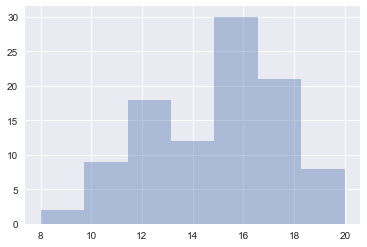

In [23]:
sns.distplot(head_count, kde=False)

**Exercise**: Try setting `kde=True` in the above cell and observe what happens

In [ ]:
# Do that here...

In [24]:
#Number of times the experiment returned 24 heads.
head_count[head_count>=24]

array([], dtype=int32)

In [9]:
print("No of times experiment returned 24 heads or more:", head_count[head_count>=24].shape[0])
print("% of times with 24 or more heads: ", head_count[head_count>=24].shape[0]/float(head_count.shape[0])*100

No of times experiment returned 24 heads or more: 0
% of times with 24 or more heads:  0.0


####  Exercise: Repeat the experiment 100,000 times. 

# Is the coin fair?

### Extra pointers on numpy

**** Removing `for` loop in the funciton ****

In [10]:
def coin_toss_experiment_2(times_to_repeat):

    head_count = np.empty([times_to_repeat,1], dtype=int)
    experiment = np.random.randint(0,2,[times_to_repeat,total_tosses])
    return experiment.sum(axis=1)

#### Exercise: Benchmark `coin_toss_experiment` and `coin_toss_experiment_2` for 100 and 100,000 runs and report improvements, if any